### Mnist classification using simple neural net architecture by Anas Puthawala

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.6.0'

In [3]:
data = tf.keras.datasets.mnist

In [4]:
(train_img, train_labels), (test_img, test_labels) = data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


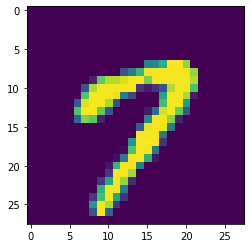

In [5]:
plt.imshow(train_img[15])

In [6]:
train_img[15].shape

(28, 28)

In [7]:
train_img.shape

(60000, 28, 28)

In [8]:
print(train_img[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
#Reshaping data
sample_shape = train_img[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

In [10]:
print(train_img[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
# #Modifying the input shape
# input_train = input_train.reshape(len(input_train), input_shape[0], input_shape[1], input_shape[2])
# input_test  = input_test.reshape(len(input_test), input_shape[0], input_shape[1], input_shape[2])

train_img = train_img.reshape(len(train_img), input_shape[0], input_shape[1], input_shape[2])

test_img = test_img.reshape(len(test_img), input_shape[0], input_shape[1], input_shape[2])

# train_labels = train_labels.reshape(len(train_labels), input_shape[0], input_shape[1], input_shape[2])

print(train_img.shape, test_img.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [12]:
# Normalize the data by dividing by 255
train_img = train_img / 255.0
test_img = test_img / 255.0

### Building the neural network

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

In [14]:
# Define model architecture
model= keras.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [16]:
#Compiling the model
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
    

### Training the model and evaluating performance

In [17]:
model.fit(train_img, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1495 - accuracy: 0.9539
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0457 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0186 - accuracy: 0.9940


In [23]:
# Evaluating performance on test images and labels
model.evaluate(test_img, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0317 - accuracy: 0.9906


[0.03167874738574028, 0.9905999898910522]

We can see that we had over 99% accuracy which is good

In [24]:
y_preds = model.predict(test_img)

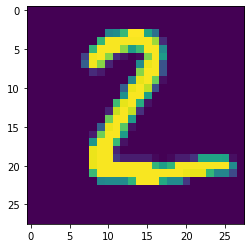

In [37]:
plt.imshow(np.squeeze(test_img[1]))
plt.show()

In [31]:
print('The predicted value using the model is: ', np.argmax(y_preds[1]))

The predicted value using the model is:  2


In [38]:
y_predicted_labels = [np.argmax(i) for i in y_preds]

In [39]:
cm = tf.math.confusion_matrix(labels=test_labels,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    0,    0,    1,    0,    1],
       [   0, 1130,    0,    0,    0,    2,    2,    0,    1,    0],
       [   1,    2, 1023,    1,    1,    0,    0,    4,    0,    0],
       [   0,    0,    1, 1005,    0,    3,    0,    0,    1,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    1,    4],
       [   1,    0,    0,    3,    0,  885,    1,    1,    0,    1],
       [   3,    2,    0,    0,    1,    3,  948,    0,    1,    0],
       [   0,   13,    3,    0,    0,    0,    0, 1010,    1,    1],
       [   2,    0,    1,    0,    0,    2,    0,    2,  966,    1],
       [   0,    5,    0,    0,    6,    6,    1,    2,    2,  987]],
      dtype=int32)>

In [41]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix Heatmap using Seaborn library for assessing model performance')

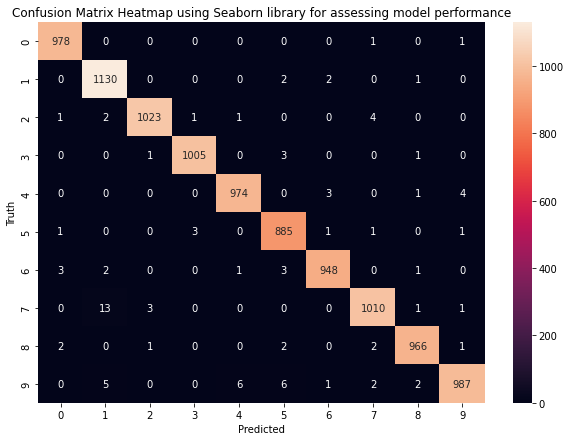

In [46]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Heatmap using Seaborn library for assessing model performance')

We can see that we have very good results. The digit where most errors occurred was a 7. **13** 7s were incorrectly predicted as 1s. 